## Data analyste - Drug consumption

# Modelisation


In [244]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import math
from matplotlib import pyplot as plt

In [300]:
def despine_ax(ax):
    """
    Enlève les contours d'un axe dans une figure.
    """
    for spine in ax.spines.values():
        spine.set_visible(False)

In [301]:
print(drugs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
Ref          1885 non-null int64
Age          0 non-null category
Gender       1885 non-null float64
Education    1885 non-null float64
Country      1885 non-null float64
Ethnicity    1885 non-null float64
Nscore       1885 non-null float64
Escore       1885 non-null float64
Oscore       1885 non-null float64
Ascore       1885 non-null float64
Cscore       1885 non-null float64
Impulsive    1885 non-null float64
SS           1885 non-null float64
Alcohol      1885 non-null object
Amphet       1885 non-null object
Amyl         1885 non-null object
Benzos       1885 non-null object
Caff         1885 non-null object
Cannabis     1885 non-null object
Choc         1885 non-null object
Coke         1885 non-null object
Crack        1885 non-null object
Ecstasy      1885 non-null object
Heroin       1885 non-null object
Ketamine     1885 non-null object
Legalh       1885 non-null object


In [326]:
path = "drug_consumption.data"
drugs = pd.read_csv(path, header=None, encoding="latin1")

In [327]:
drugs.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [328]:
drugs.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64')

In [329]:
nouvelles_columns = ['Ref', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy',  'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semeron', 'VSA']

In [330]:
list(zip(nouvelles_columns, drugs.columns))

[('Ref', 0),
 ('Age', 1),
 ('Gender', 2),
 ('Education', 3),
 ('Country', 4),
 ('Ethnicity', 5),
 ('Nscore', 6),
 ('Escore', 7),
 ('Oscore', 8),
 ('Ascore', 9),
 ('Cscore', 10),
 ('Impulsive', 11),
 ('SS', 12),
 ('Alcohol', 13),
 ('Amphet', 14),
 ('Amyl', 15),
 ('Benzos', 16),
 ('Caff', 17),
 ('Cannabis', 18),
 ('Choc', 19),
 ('Coke', 20),
 ('Crack', 21),
 ('Ecstasy', 22),
 ('Heroin', 23),
 ('Ketamine', 24),
 ('Legalh', 25),
 ('LSD', 26),
 ('Meth', 27),
 ('Mushrooms', 28),
 ('Nicotine', 29),
 ('Semeron', 30),
 ('VSA', 31)]

In [331]:
drugs.columns = nouvelles_columns

In [332]:
drugs.head()

,Ref,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semeron,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [333]:
drugs.Age[0]

0.49788000000000004

In [334]:
AgeRanges = {
    -0.9519700000000001 : "18-24",
    -0.07854 : "25-34",
    0.49788000000000004 : "35-44",
    1.09449 : "45-54",
    1.82213 : "55-64", 
    2.59171 : "65+"
}
AgeRanges

{-0.9519700000000001: '18-24',
 -0.07854: '25-34',
 0.49788000000000004: '35-44',
 1.09449: '45-54',
 1.82213: '55-64',
 2.59171: '65+'}

In [335]:
drugs["Age"]=drugs.Age.map(AgeRanges)
drugs["Age"] = drugs["Age"].astype("category")
drugs.head()

,Ref,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semeron,VSA
0,1,35-44,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25-34,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,35-44,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,18-24,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,35-44,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [336]:
GenderValues = {
    0.48246000000000006 : "Female",
    -0.48246000000000006: "Male"
}
GenderValues

{0.48246000000000006: 'Female', -0.48246000000000006: 'Male'}

In [337]:
drugs["Gender"] = drugs.Gender.map(GenderValues)
drugs["Gender"] = drugs["Gender"].astype("category")

In [338]:
drugs.head()

,Ref,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semeron,VSA
0,1,35-44,Female,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25-34,Male,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,35-44,Male,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,18-24,Female,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,35-44,Female,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [339]:
tab = drugs.pivot_table(index=["Gender"], 
                         columns=["Age"],
                         values=["Ref"],
                         aggfunc="count",
                         fill_value=0)

In [340]:
tab.head()

Ref                            
Age    18-24 25-34 35-44 45-54 55-64 65+
Gender                                  
Female   237   294   202   158    43   8
Male     406   187   154   136    50  10

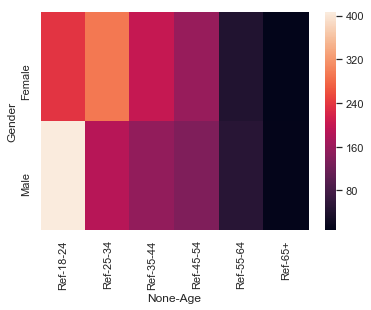

In [341]:
sns.heatmap(tab)

In [342]:
EducationMeaning = {
    -2.43591: "Left school at 16",
    -1.73790: "Left school at 17",
    -1.43719: "Left school at 18",
    -1.22751: "Left school at 18 years",
    -0.6111300000000001 : "Some college or university, no certificate or degree",
    -0.059210000000000006: "Professional certificate/diploma",
    0.45468000000000003 : "University degree", 
    1.16365 : "Masters degree",
    1.98437 : "Doctorate degree"
}
EducationMeaning

{-2.43591: 'Left school at 16',
 -1.7379: 'Left school at 17',
 -1.43719: 'Left school at 18',
 -1.22751: 'Left school at 18 years',
 -0.6111300000000001: 'Some college or university, no certificate or degree',
 -0.059210000000000006: 'Professional certificate/diploma',
 0.45468000000000003: 'University degree',
 1.16365: 'Masters degree',
 1.98437: 'Doctorate degree'}

In [343]:
drugs["Education"] = drugs.Education.map(EducationMeaning)
drugs["Education"] = drugs["Education"].astype('category');

In [344]:
ClassValue = {
    "CL0" : "Never Used",
    "CL1" : "Used over a Decade Ago",
    "CL2" : "Used in Last Decade",
    "CL3" : "Used in Last Year",
    "CL4" : "Used in Last Month",
    "CL5" : "Used in Last Week",
    "CL6" : "Used in Last Day",
    
}
ClassValue

{'CL0': 'Never Used',
 'CL1': 'Used over a Decade Ago',
 'CL2': 'Used in Last Decade',
 'CL3': 'Used in Last Year',
 'CL4': 'Used in Last Month',
 'CL5': 'Used in Last Week',
 'CL6': 'Used in Last Day'}

In [345]:
drugs["Alcohol"] = drugs.Alcohol.map(ClassValue);
drugs["Alcohol"] = drugs["Alcohol"].astype('category');
drugs["Amphet"] = drugs.Amphet.map(ClassValue);
drugs["Amphet"] = drugs["Amphet"].astype('category');
drugs["Amyl"] = drugs.Amyl.map(ClassValue);
drugs["Amyl"] = drugs["Amyl"].astype('category');
drugs["Benzos"] = drugs.Benzos.map(ClassValue);
drugs["Benzos"] = drugs["Benzos"].astype('category');
drugs["Caff"] = drugs.Caff.map(ClassValue);
drugs["Caff"] = drugs["Caff"].astype('category');
drugs["Cannabis"] = drugs.Cannabis.map(ClassValue);
drugs["Cannabis"] = drugs["Cannabis"].astype('category');
drugs["Choc"] = drugs.Choc.map(ClassValue);
drugs["Choc"] = drugs["Choc"].astype('category');
drugs["Coke"] = drugs.Coke.map(ClassValue);
drugs["Coke"] = drugs["Coke"].astype('category');
drugs["Crack"] = drugs.Crack.map(ClassValue);
drugs["Crack"] = drugs["Crack"].astype('category');
drugs["Ecstasy"] = drugs.Ecstasy.map(ClassValue);
drugs["Ecstasy"] = drugs["Ecstasy"].astype('category');
drugs["Heroin"] = drugs.Heroin.map(ClassValue);
drugs["Heroin"] = drugs["Heroin"].astype('category');
drugs["Ketamine"] = drugs.Ketamine.map(ClassValue);
drugs["Ketamine"] = drugs["Ketamine"].astype('category');
drugs["Legalh"] = drugs.Legalh.map(ClassValue);
drugs["Legalh"] = drugs["Legalh"].astype('category');
drugs["LSD"] = drugs.LSD.map(ClassValue);
drugs["LSD"] = drugs["LSD"].astype('category');
drugs["Meth"] = drugs.Meth.map(ClassValue);
drugs["Meth"] = drugs["Meth"].astype('category');
drugs["Mushrooms"] = drugs.Mushrooms.map(ClassValue);
drugs["Mushrooms"] = drugs["Mushrooms"].astype('category');
drugs["Nicotine"] = drugs.Nicotine.map(ClassValue);
drugs["Nicotine"] = drugs["Nicotine"].astype('category');
drugs["Semeron"] = drugs.Semeron.map(ClassValue);
drugs["Semeron"] = drugs["Semeron"].astype('category');
drugs["VSA"] = drugs.VSA.map(ClassValue);
drugs["VSA"] = drugs["VSA"].astype('category');

In [346]:
drugs.head()

,Ref,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semeron,VSA
0,1,35-44,Female,Professional certificate/diploma,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
1,2,25-34,Male,Doctorate degree,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,Used in Last Month,Never Used,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Year,Never Used,Used in Last Month,Never Used,Never Used
2,3,35-44,Male,Professional certificate/diploma,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Never Used
3,4,18-24,Female,Masters degree,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,Never Used,Never Used,Used in Last Decade,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
4,5,35-44,Female,Doctorate degree,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,Used over a Decade Ago,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Used in Last Decade,Used in Last Decade,Never Used,Never Used


In [347]:
res = drugs.groupby(["Mushrooms", "Gender"])["Ref"].count()
res

Mushrooms               Gender
Never Used              Female    608
                        Male      374
Used in Last Day        Female      2
                        Male        2
Used in Last Decade     Female    111
                        Male      149
Used in Last Month      Female     27
                        Male       88
Used in Last Week       Female     12
                        Male       28
Used in Last Year       Female     79
                        Male      196
Used over a Decade Ago  Female    103
                        Male      106
Name: Ref, dtype: int64

In [348]:
tab = pd.pivot_table(drugs,
                     index=["Gender"],
                     values=["Ref"],
                     columns=["Mushrooms"],
                     aggfunc="count")
tab

Ref                                                          \
Mushrooms Never Used Used in Last Day Used in Last Decade Used in Last Month   
Gender                                                                         
Female           608                2                 111                 27   
Male             374                2                 149                 88   

                                                                      
Mushrooms Used in Last Week Used in Last Year Used over a Decade Ago  
Gender                                                                
Female                   12                79                    103  
Male                     28               196                    106

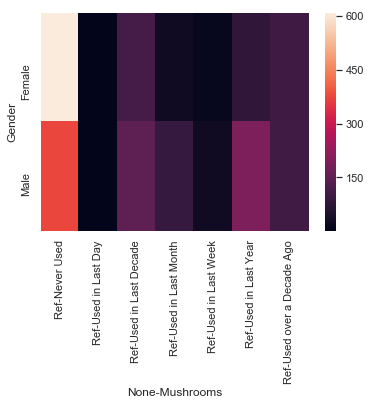

In [349]:
sns.heatmap(tab)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000148AFD71208>,
      dtype=object)

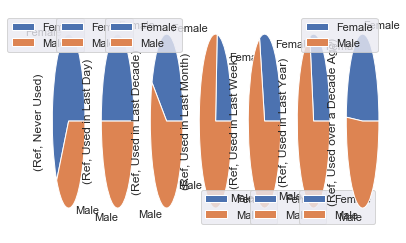

In [350]:
tab.plot.pie(subplots=True)

In [351]:
tab

Ref                                                          \
Mushrooms Never Used Used in Last Day Used in Last Decade Used in Last Month   
Gender                                                                         
Female           608                2                 111                 27   
Male             374                2                 149                 88   

                                                                      
Mushrooms Used in Last Week Used in Last Year Used over a Decade Ago  
Gender                                                                
Female                   12                79                    103  
Male                     28               196                    106

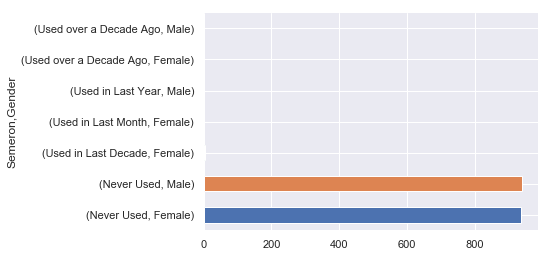

In [353]:
title = ""
to_plot = drugs.groupby(["Semeron", "Gender"])["Ref"].count()
#barh : 
ax = to_plot.plot.barh(title=title)
despine_ax(ax)

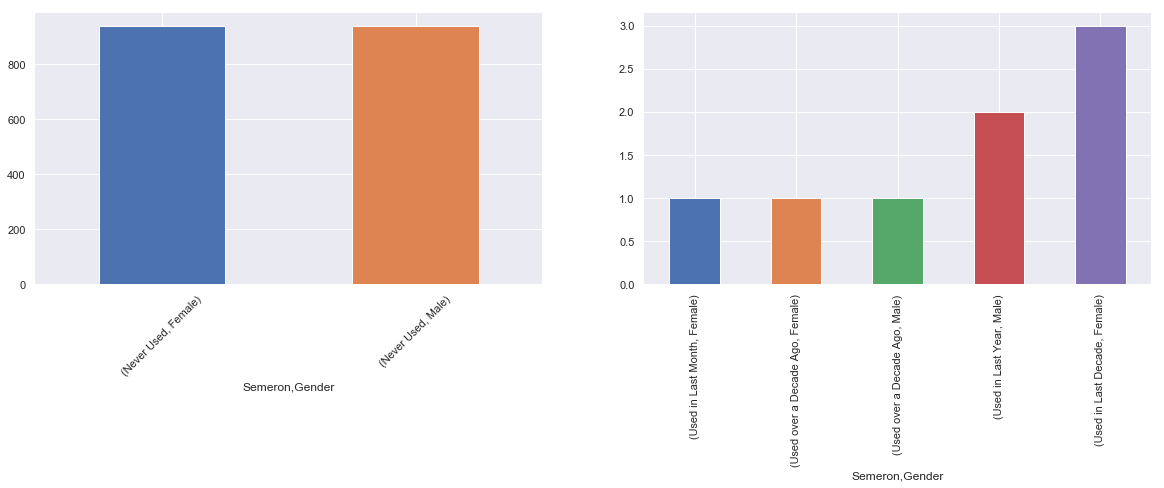

In [354]:
plt.figure(1, figsize=(20,5))

ax    = plt.subplot(121)
title = ""
to_plot.sort_values()[5:].plot.bar(title=title, rot=45, ax=ax)
despine_ax(ax)

ax    = plt.subplot(122)
title = ""
to_plot.sort_values()[:5].plot.bar(title=title, rot=90, ax=ax)
despine_ax(ax)

In [355]:
drugs.groupby(["Meth", "Gender"])["Ref"].count()

Meth                    Gender
Never Used              Female    789
                        Male      640
Used in Last Day        Female     20
                        Male       53
Used in Last Decade     Female     39
                        Male       58
Used in Last Month      Female     19
                        Male       31
Used in Last Week       Female     17
                        Male       31
Used in Last Year       Female     40
                        Male      109
Used over a Decade Ago  Female     18
                        Male       21
Name: Ref, dtype: int64

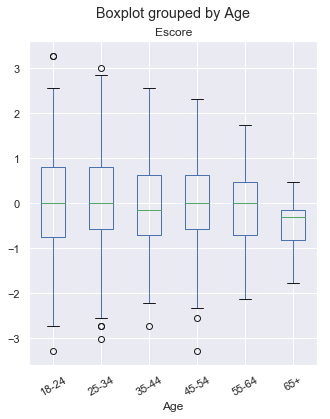

In [356]:
drugs.boxplot('Escore','Age',rot = 30,figsize=(5,6))

In [357]:
methCount = drugs['Meth'].value_counts()
methCount

Never Used                1429
Used in Last Year          149
Used in Last Decade         97
Used in Last Day            73
Used in Last Month          50
Used in Last Week           48
Used over a Decade Ago      39
Name: Meth, dtype: int64

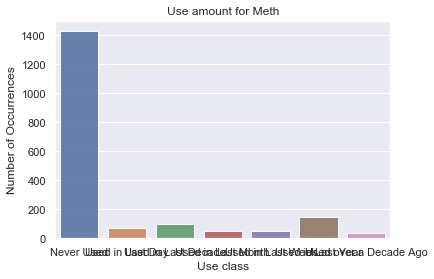

In [358]:
sns.set(style="darkgrid")
mathCount = methCount.sort_index()
sns.barplot(methCount.index, methCount.values, alpha=0.9)
plt.title('Use amount for Meth')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Use class', fontsize=12)
plt.show()

In [359]:
onlyCat_drugs = drugs.select_dtypes(include=['category']).copy()

In [360]:
onlyCat_drugs.head()

,Age,Gender,Education,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semeron,VSA
0,35-44,Female,Professional certificate/diploma,Used in Last Week,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Day,Never Used,Used in Last Week,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
1,25-34,Male,Doctorate degree,Used in Last Week,Used in Last Decade,Used in Last Decade,Never Used,Used in Last Day,Used in Last Month,Used in Last Day,...,Used in Last Month,Never Used,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Year,Never Used,Used in Last Month,Never Used,Never Used
2,35-44,Male,Professional certificate/diploma,Used in Last Day,Never Used,Never Used,Never Used,Used in Last Day,Used in Last Year,Used in Last Month,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Never Used
3,18-24,Female,Masters degree,Used in Last Month,Never Used,Never Used,Used in Last Year,Used in Last Week,Used in Last Decade,Used in Last Month,...,Never Used,Never Used,Used in Last Decade,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
4,35-44,Female,Doctorate degree,Used in Last Month,Used over a Decade Ago,Used over a Decade Ago,Never Used,Used in Last Day,Used in Last Year,Used in Last Day,...,Used over a Decade Ago,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Used in Last Decade,Used in Last Decade,Never Used,Never Used


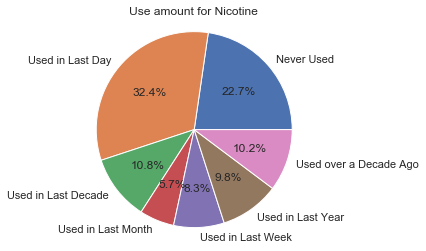

In [363]:
labels = onlyCat_drugs['Nicotine'].astype('category').cat.categories.tolist()
counts = onlyCat_drugs['Nicotine'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False) #autopct is show the % on plot
ax1.axis('equal')
plt.title('Use amount for Nicotine')
plt.show()

In [369]:
AlchoholUseSS = drugs.groupby(["Alcohol", "SS"])["Ref"].count()
AlchoholUseSS

Alcohol                 SS      
Never Used              -2.07848      1
                        -1.54858      7
                        -1.18084      5
                        -0.84637      3
                        -0.52593      5
                        -0.21575      4
                         0.07987      4
                         0.40148      1
                         0.76540      2
                         1.22470      1
                         1.92173      1
Used in Last Day        -2.07848     16
                        -1.54858     16
                        -1.18084     29
                        -0.84637     41
                        -0.52593     59
                        -0.21575     53
                         0.07987     60
                         0.40148     69
                         0.76540     67
                         1.22470     61
                         1.92173     34
Used in Last Decade     -2.07848      4
                        -1.54858      3
       